# *Gender Bias in Virtual Assistants Project*

### Identificando Preconceitos de Gênero em Assistentes Virtuais

![From Google](https://media-assets-01.thedrum.com/cache/images/thedrum-prod/s3-news-tmp-145694-untitled_design_70--default--1280.png)

### Equipe formada por
- Bárbara Stéphanie Neves Oliveira, 507526
- Lucas Benjamim Cunha Bandeira, 507533
- Samir Braga Chaves, 513788
- Vinicius Bernardo Gabriel, 475210

# LSTM *Classifier for Wikipedia Toxic Comments*

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


# Packages

In [2]:
!pip install scikit-multilearn
!pip install tensorflow-addons
!pip install transformers
!pip install keras-tqdm

     |████████████████████████████████| 89 kB 3.6 MB/s 
     |████████████████████████████████| 679 kB 5.1 MB/s 
     |████████████████████████████████| 2.6 MB 5.3 MB/s 
     |████████████████████████████████| 636 kB 36.9 MB/s 
     |████████████████████████████████| 895 kB 34.6 MB/s 
     |████████████████████████████████| 3.3 MB 59.2 MB/s 
  Attempting uninstall: pyyaml
    Found existing installation: PyYAML 3.13
    Uninstalling PyYAML-3.13:
      Successfully uninstalled PyYAML-3.13


# Imports

In [3]:
import ast
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from tqdm import tqdm_notebook
import tensorflow as tf
from tensorflow.keras.metrics import AUC
from tensorflow_addons.metrics import F1Score

from sklearn.metrics import classification_report

BASE_PATH = '/content/drive/MyDrive/Ciência de Dados/Projeto Final'
DATASETS_PATH = BASE_PATH + "/Resources/Datasets"

/usr/local/lib/python3.7/dist-packages/tensorflow_addons/utils/ensure_tf_install.py:67: UserWarning: Tensorflow Addons supports using Python ops for all Tensorflow versions above or equal to 2.3.0 and strictly below 2.6.0 (nightly versions are not supported). 
 The versions of TensorFlow you are currently using is 2.6.0 and is not supported. 
Some things might work, some things might not.
If you were to encounter a bug, do not file an issue.
If you want to make sure you're using a tested and supported configuration, either change the TensorFlow version or the TensorFlow Addons's version. 
You can find the compatibility matrix in TensorFlow Addon's readme:
https://github.com/tensorflow/addons
  UserWarning,


In [4]:
# Adicionando módulos customizados ao path
import sys
import warnings
warnings.filterwarnings('ignore')

sys.path.append(BASE_PATH + '/Modules')

import utils, text, model
from importlib import reload

INFO:absl:Entering into master device scope: /job:worker/replica:0/task:0/device:CPU:0


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Clearing out eager caches


INFO:tensorflow:Initializing the TPU system: grpc://10.118.20.218:8470


INFO:tensorflow:Initializing the TPU system: grpc://10.118.20.218:8470


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Finished initializing TPU system.


INFO:tensorflow:Found TPU system:


INFO:tensorflow:Found TPU system:


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Cores: 8


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Workers: 1


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Num TPU Cores Per Worker: 8


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:localhost/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:CPU:0, CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:0, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:1, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:2, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:3, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:4, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:5, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:6, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU:7, TPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:TPU_SYSTEM:0, TPU_SYSTEM, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


INFO:tensorflow:*** Available Device: _DeviceAttributes(/job:worker/replica:0/task:0/device:XLA_CPU:0, XLA_CPU, 0, 0)


# Leitura dos Dados

In [5]:
df = pd.read_csv(DATASETS_PATH + '/Wikipedia Toxic Comments/new_data.csv')

df.head()

,id,comment_text,toxic,severe_toxic,obscene,threat,insult,identity_hate,labels_count,if_safe,comment_text_tokens,clean_comment_text,comment_text_tokens_count,clean_comment_text_words2ignore
0,02c6e41e4b317ac3,WOULDN'T BE THE FIRST TIME BITCH. FUCK YOU I'L...,1,1,1,1,1,1,6,False,"['wouldnt', 'time', 'bitch', 'fuck', 'ill', 'f...",wouldnt be the first time bitch fuck you ill f...,28,wouldnt time bitch fuck ill find live sodomize...
1,039296aa294ee10b,"SHUT UP, YOU FAT POOP, OR I WILL KICK YOUR ASS!!!",1,1,1,1,1,1,6,False,"['shut', 'fat', 'poop', 'kick', 'ass']",shut up you fat poop or i will kick your ass,11,shut fat poop kick ass
2,1368c10281978876,"You're a stupid cunt \n\nFuck you dumb arse, y...",1,1,1,1,1,1,6,False,"['youre', 'stupid', 'cunt', 'fuck', 'dumb', 'a...",youre a stupid cunt fuck you dumb arse your mu...,59,youre stupid cunt fuck dumb arse mum hairy cun...
3,24d2b50726b67167,I am going to murder ZimZalaBim ST47 for being...,1,1,1,1,1,1,6,False,"['going', 'murder', 'zimzalabim', 'st47', 'evi...",i am going to murder zimzalabim st47 for being...,12,going murder zimzalabim st47 evil homosexual jews
4,3a704e2efa9fa300,FUCK YOU!!!!!!!!!!!! YOU FUCKING NIGGER BAG OF...,1,1,1,1,1,1,6,False,"['fuck', 'fucking', 'nigger', 'bag', 'shit', '...",fuck you you fucking nigger bag of shit i hope...,42,fuck fucking nigger bag shit hope die horrible...


In [6]:
labels = ['toxic', 'severe_toxic',	'obscene', 'threat', 'insult', 'identity_hate']

# Leitura das *Word Embeddings* Pré-Treinadas

In [7]:
FASTTEXT = {}
f = open(BASE_PATH + '/Resources/FastText Word Embeddings/wiki-news-300d-1M.vec', encoding='utf8')
index = 1

for line in f:
  values = line.split()
  word = values[0]
  FASTTEXT[word] = (index, np.asarray(values[1:], dtype='float32'))
  index += 1
f.close()

print('Quantidade de word embeddings = {}'.format(len(FASTTEXT.keys())))

Quantidade de word embeddings = 999995


# Treinamento do LSTM *Classifier*

## Representação Textual

In [8]:
df['comment_text_tokens'] = df['comment_text_tokens'].apply(lambda x: list(ast.literal_eval(x)))

padded_tokens = text.padding_sequences_ftext(df['comment_text_tokens'].to_numpy(), FASTTEXT, text.MAX_LENGTH)


Text to sequences for LSTM Classifier with FastText embeddings:   0%|          | 0/16188 [00:00<?, ?it/s]

Padding the sequences...


## Divisão Estratificada

In [9]:
y = df[labels].to_numpy()

X_train, y_train, X_test, y_test, X_dev, y_dev = text.data_split(padded_tokens, y, test_size=0.2, dev_size=0.1, random_seed=42)

(X_train.shape, y_train.shape), (X_test.shape, y_test.shape), (X_dev.shape, y_dev.shape), y.shape

(((11655, 60), (11655, 6)),
 ((3238, 60), (3238, 6)),
 ((1295, 60), (1295, 6)),
 (16188, 6))

In [10]:
from collections import Counter
from skmultilearn.model_selection.measures import get_combination_wise_output_matrix

result_comb_matrix = pd.DataFrame({
    'data':  Counter(str(combination) for row in get_combination_wise_output_matrix(y, order=1) for combination in row),
    'train': Counter(str(combination) for row in get_combination_wise_output_matrix(y_train, order=1) for combination in row),
    'test':  Counter(str(combination) for row in get_combination_wise_output_matrix(y_test, order=1) for combination in row),
    'dev':   Counter(str(combination) for row in get_combination_wise_output_matrix(y_dev, order=1) for combination in row)
}).T.fillna(0.0)

result_comb_matrix.style.background_gradient(cmap=plt.get_cmap('Pastel2'))

,"(0,)","(1,)","(2,)","(3,)","(4,)","(5,)"
data,4027,1586,3510,571,3348,1131
train,2640,1142,2515,411,2398,1074
test,991,317,716,114,684,47
dev,396,127,279,46,266,10


In [11]:
test_data = pd.DataFrame(columns=['tokens_ids', 'y'])

for ids, y in zip(X_test, y_test):
  test_data = test_data.append({
      'tokens_ids': ids,
      'y': y
  }, ignore_index=True)

test_data.to_json(DATASETS_PATH + '/Wikipedia Toxic Comments/lstm_padded_test_data.json', orient='records')

## Treino do Modelo

In [12]:
embedding_dim = 300
embedding_matrix = np.random.random((len(FASTTEXT.keys()) + 1, embedding_dim))

with tqdm_notebook(total=len(FASTTEXT.items())) as pbar:
  for word in FASTTEXT.keys():
      embedding_tuple = FASTTEXT.get(word)
      if embedding_tuple is not None:
          embedding_matrix[embedding_tuple[0]] = embedding_tuple[1]
      pbar.update(1)
  pbar.close()

  0%|          | 0/999995 [00:00<?, ?it/s]

In [13]:
np.random.seed(42)
tf.random.set_seed(42)

auc_score = AUC(multi_label=True)
# f1_score = F1Score(num_classes=y.shape[1], threshold=0.5, average='weighted')

model_path = BASE_PATH + '/Resources/Models/best_lstm_classifier_toxic_comments.h5'

model_meta = model.run_text_classifier(model.lstm_classifier,
                                       X_train, y_train,
                                       X_dev, y_dev,
                                       batch_size=32,
                                       max_epochs=100,
                                       patience=10,
                                       eval_metric=auc_score,
                                       monitor='val_auc',
                                       source_length=text.MAX_LENGTH,
                                       hidden_units=252,
                                       labels_size=len(labels), 
                                       model_path=model_path,
                                       vocab_size=len(FASTTEXT.keys()) + 1,
                                       embedding_dim=embedding_dim,
                                       embedding_matrix=embedding_matrix)

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 60)]              0         
_________________________________________________________________
embedding (Embedding)        (None, 60, 300)           299998800 
_________________________________________________________________
lstm (LSTM)                  (None, 60, 252)           557424    
_________________________________________________________________
global_max_pooling1d (Global (None, 252)               0         
_________________________________________________________________
dropout (Dropout)            (None, 252)               0         
_________________________________________________________________
dense (Dense)                (None, 252)               63756     
_________________________________________________________________
dropout_1 (Dropout)          (None, 252)               0     

365/365 [==============================] - 35s 89ms/step - loss: 0.4095 - auc: 0.5808 - val_loss: 0.3605 - val_auc: 0.7909

Epoch 00001: val_auc improved from -inf to 0.79093, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_toxic_comments.h5
Epoch 2/100
365/365 [==============================] - 34s 92ms/step - loss: 0.2642 - auc: 0.8611 - val_loss: 0.2820 - val_auc: 0.8442

Epoch 00002: val_auc improved from 0.79093 to 0.84424, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_toxic_comments.h5
Epoch 3/100
365/365 [==============================] - 34s 94ms/step - loss: 0.2056 - auc: 0.9096 - val_loss: 0.2802 - val_auc: 0.8577

Epoch 00003: val_auc improved from 0.84424 to 0.85772, saving model to /content/drive/MyDrive/Ciência de Dados/Projeto Final/Resources/Models/best_lstm_classifier_toxic_comments.h5
Epoch 4/100
365/365 [==============================] - 34s 93

In [14]:
model_meta['run_time'], model_meta['start'], model_meta['final']

('00:29:56', '18/08/2021 15:45', '18/08/2021 16:19')

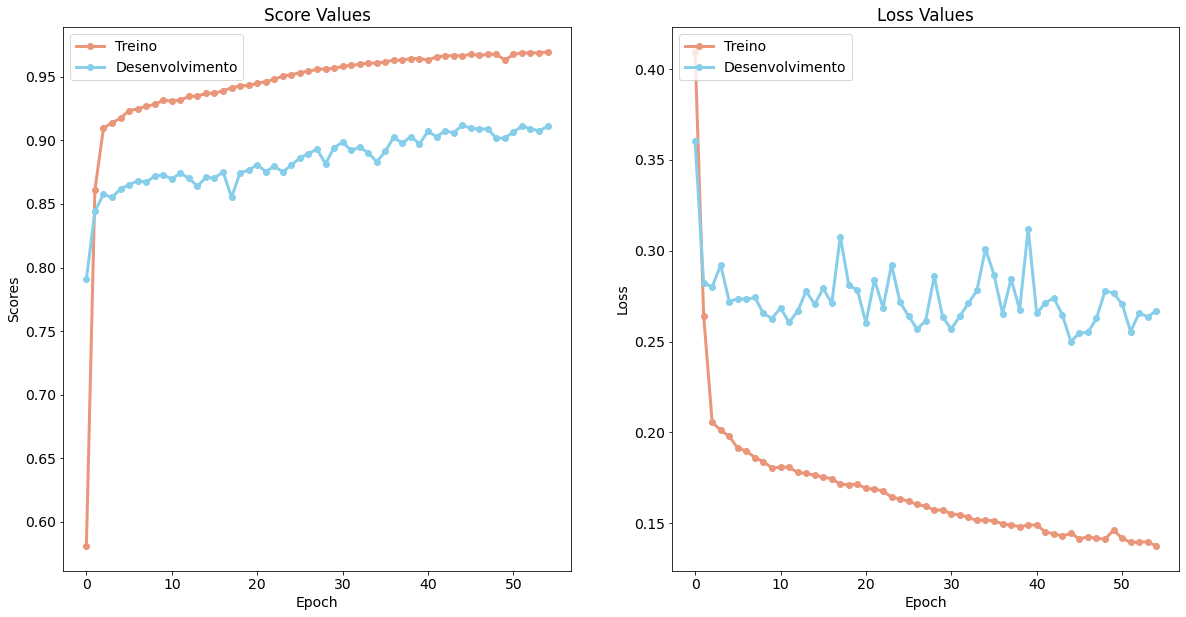

In [15]:
model.plot_model_loss_score(model_meta['history'], score_name='auc')

In [16]:
model_meta['model'].load_weights(model_path)
y_pred = np.rint(model_meta['model'].predict(X_test))

print(classification_report(y_test, y_pred, target_names=labels))

               precision    recall  f1-score   support

        toxic       0.81      0.71      0.75       991
 severe_toxic       0.66      0.48      0.56       317
      obscene       0.70      0.77      0.73       716
       threat       0.62      0.54      0.57       114
       insult       0.58      0.64      0.61       684
identity_hate       0.23      0.66      0.34        47

    micro avg       0.67      0.67      0.67      2869
    macro avg       0.60      0.63      0.59      2869
 weighted avg       0.69      0.67      0.68      2869
  samples avg       0.18      0.20      0.19      2869

